# SSD Inference Tutorial

This a quick start for YOLK that shows how to use a trained Single-Shot MultiBox Detector(SSD) for inference on the Pascal VOC datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.optimizers import SGD

import yolk

Using TensorFlow backend.
Using SSD backend


## Step 1. Load a trained SSD
`load_inference_model()` builds the model and load trained weights into it. <br>
Get SSD loss with `get_losses()` and compile the model.

------

You can find a trained model weights link below.<br>
https://github.com/pierluigiferrari/ssd_keras/<br>
Or you can download weights directly here.<br>
https://drive.google.com/file/d/1fyDDUcIOSjeiP08vl1WCndcFdtboFXua/view

In [2]:
model_path = 'VGG_VOC0712Plus_SSD_300x300_ft_iter_160000.h5'
model = yolk.detector.load_inference_model(model_path)

loss = yolk.detector.get_losses()
sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

model.compile(optimizer=sgd, loss=loss)

tracking <tf.Variable 'conv4_3_norm/conv4_3_norm_gamma:0' shape=(512,) dtype=float32> gamma


## Step 2. Load images

In [3]:
image_path = 'examples/000000008021.jpg'
image = yolk.detector.preprocessing_image(image_path)

## Step 3. Make predictions
You can also set a confidence threshold for your result.

In [4]:
y_pred = model.predict(image)

confidence_threshold = 0.5
y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]
np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_thresh[0])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[ 15.     1.   111.36  54.84 207.5  231.97]
 [ 15.     0.99  -7.9  156.5  154.81 305.85]
 [ 15.     0.96 175.66 173.09 304.68 307.5 ]]


## Step 4. Visualize the predictions

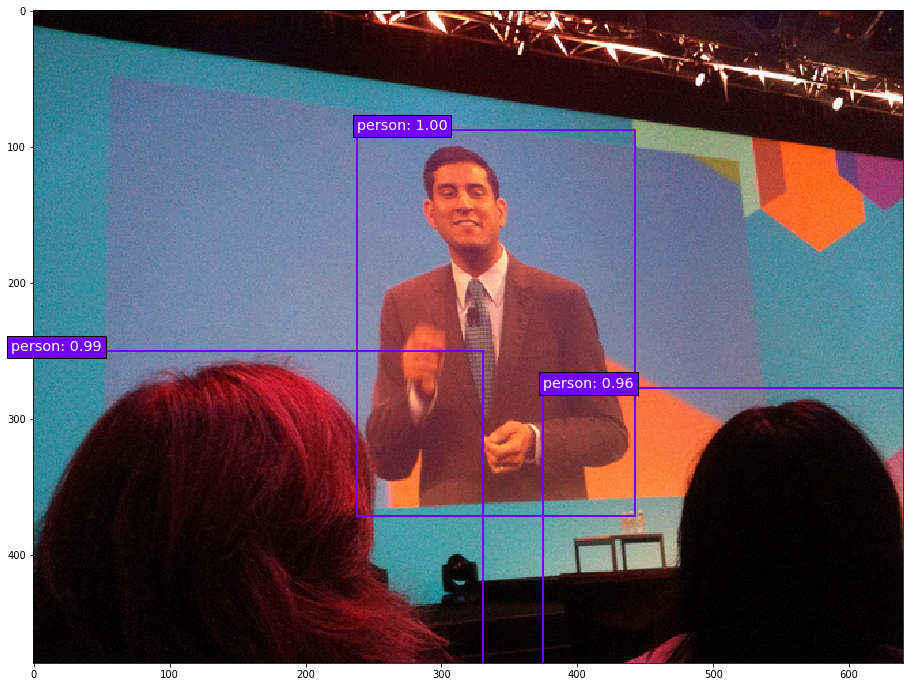

In [5]:
yolk.detector.show_result(image_path, y_pred_thresh)